In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import math
%matplotlib inline

In [2]:
total_case = pd.read_csv("nyc_covid.csv")
total_case['Date'] = pd.to_datetime(total_case['Date'])
total_case['Date'] = total_case['Date'].dt.strftime('%m-%d')
total_case.set_index('Date', inplace=True)
total_case

,Total_Case,Bronx,Brooklyn,Manhattan,Queens,Staten_Island,Unknow,Deaths,daily_hosp,hosp
Date,,,,,,,,,,
03-17,923,106,236,290,248,42,1,10,355,1607
03-18,2009,303,505,590,533,77,1,19,466,2073
03-19,3954,496,1195,1038,1042,179,4,26,552,2625
03-20,5683,736,1740,1402,1514,285,6,43,664,3289
03-21,8115,1071,2484,1863,2254,437,6,60,690,3979
03-22,10764,1564,3154,2324,3050,666,6,99,729,4708
03-23,13119,1999,3742,2646,3848,877,7,125,1042,5750
03-24,15597,2505,4407,3013,4667,999,6,192,1163,6913
03-25,20011,3452,5232,3616,6420,1166,35,280,1296,8209


In [3]:
total = total_case[['Total_Case']]

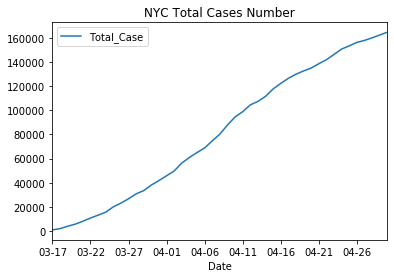

In [4]:
total.plot.line(title = 'NYC Total Cases Number')

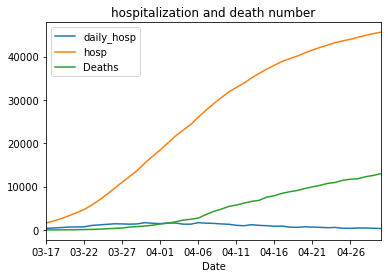

In [5]:
hosp = total_case[['daily_hosp','hosp','Deaths']]
hosp.plot.line(title = 'hospitalization and death number')

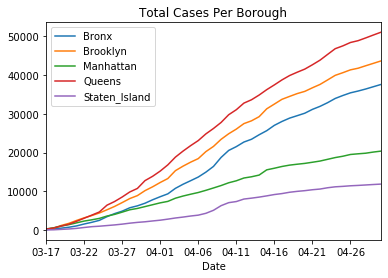

In [6]:
boro = total_case[['Bronx','Brooklyn','Manhattan','Queens','Staten_Island']]
boro.plot.line(title = 'Total Cases Per Borough')

In [7]:
import geopandas as gpd

In [8]:
zc = gpd.read_file('ZIP_CODE_040114.shp')
zc = zc[['ZIPCODE','POPULATION','geometry']]
zc

,ZIPCODE,POPULATION,geometry
0,11436,18681.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,62426.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,83866.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,56527.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,72280.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."
...,...,...,...
258,10310,25003.0,"POLYGON ((950767.507 172848.969, 950787.510 17..."
259,11693,11052.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ..."
260,11249,28481.0,"POLYGON ((995877.318 203206.075, 995968.511 20..."
261,10162,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21..."


In [9]:
facility = pd.read_csv('Health_Facility_General_Information.csv')
facility.head()

,Facility ID,Facility Name,Short Description,Description,Facility Open Date,Facility Address 1,Facility Address 2,Facility_City,Facility State,Facility_Zip,...,Cooperator Name,Cooperator Address,Cooperator Address 2,Cooperator City,Cooperator State,Cooperator Zip Code,Ownership Type,Facility Latitude,Facility Longitude,Facility Location
0,204,Hospice at Lourdes,HSPC,Hospice,06/01/1985,4102 Old Vestal Road,NaN,Vestal,New York,13850,...,NaN,NaN,NaN,NaN,New York,NaN,Not for Profit Corporation,42.097095,-75.975243,"(42.097095, -75.975243)"
1,620,Charles T Sitrin Health Care Center Inc,NH,Residential Health Care Facility - SNF,02/01/1989,2050 Tilden Avenue,NaN,New Hartford,New York,13413,...,NaN,NaN,NaN,NaN,New York,NaN,Not for Profit Corporation,43.054970,-75.228828,"(43.05497, -75.228828)"
2,654,Central Park Rehabilitation and Nursing Center,NH,Residential Health Care Facility - SNF,02/01/1989,116 Martin Luther King East,NaN,Syracuse,New York,13205,...,NaN,NaN,NaN,NaN,New York,NaN,LLC,NaN,NaN,NaN
3,1156,East Side Nursing Home,NH,Residential Health Care Facility - SNF,08/01/1979,62 Prospect St,NaN,Warsaw,New York,14569,...,NaN,NaN,NaN,NaN,New York,NaN,Business Corporation,42.738979,-78.128670,"(42.738979, -78.12867)"
4,2589,Wellsville Manor Care Center,NH,Residential Health Care Facility - SNF,02/01/1989,4192A Bolivar Road,NaN,Wellsville,New York,14895,...,NaN,NaN,NaN,NaN,New York,NaN,LLC,42.126461,-77.967834,"(42.126461, -77.967834)"


In [10]:
len(facility)

3990

In [11]:
nyc_zipcode = zc['ZIPCODE'].tolist()
nyc_facility = facility[facility.Facility_Zip.isin(nyc_zipcode)]
nyc_facility = nyc_facility[['Facility ID','Short Description','Facility_Zip']]
nyc_facility['count'] = 1
nyc_facility

,Facility ID,Short Description,Facility_Zip,count
9,6230,HOSP-EC,10003,1
12,7257,HOSP-EC,11220,1
17,9006,DTC,10019,1
24,9744,DTC,11201,1
26,9970,DTC,10017,1
...,...,...,...,...
3978,9299,DTC-EC,10459,1
3979,9361,DTC-EC,10456,1
3983,8535,DTC-EC,10021,1
3985,4615,HOSP-SB,11220,1


In [12]:
counts = nyc_facility.groupby('Facility_Zip').sum()[['count']]
counts['ZIPCODE'] = counts.index
counts

,count,ZIPCODE
Facility_Zip,,
10001,8,10001
10002,20,10002
10003,16,10003
10004,1,10004
10005,1,10005
...,...,...
11435,12,11435
11691,24,11691
11692,4,11692


In [13]:
zipcode = zc.merge(counts, on='ZIPCODE', how='left')
zipcode['count'] = zipcode['count'].fillna(0)
zipcode

,ZIPCODE,POPULATION,geometry,count
0,11436,18681.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",0.0
1,11213,62426.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",10.0
2,11212,83866.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",8.0
3,11225,56527.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",4.0
4,11218,72280.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",13.0
...,...,...,...,...
258,10310,25003.0,"POLYGON ((950767.507 172848.969, 950787.510 17...",6.0
259,11693,11052.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ...",1.0
260,11249,28481.0,"POLYGON ((995877.318 203206.075, 995968.511 20...",3.0
261,10162,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21...",0.0


In [14]:
zipcode['facilities per 100,000 person'] = (zipcode['count']/zipcode['POPULATION'])*100000
zipcode

,ZIPCODE,POPULATION,geometry,count,"facilities per 100,000 person"
0,11436,18681.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ...",0.0,0.000000
1,11213,62426.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",10.0,16.018966
2,11212,83866.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",8.0,9.539027
3,11225,56527.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",4.0,7.076264
4,11218,72280.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",13.0,17.985612
...,...,...,...,...,...
258,10310,25003.0,"POLYGON ((950767.507 172848.969, 950787.510 17...",6.0,23.997120
259,11693,11052.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ...",1.0,9.048136
260,11249,28481.0,"POLYGON ((995877.318 203206.075, 995968.511 20...",3.0,10.533338
261,10162,0.0,"POLYGON ((997731.761 219560.922, 997641.948 21...",0.0,NaN


In [16]:
zipcode[zipcode['ZIPCODE']==11236]

,ZIPCODE,POPULATION,geometry,count,"facilities per 100,000 person"


In [15]:
zipcode.to_csv('facility per person')

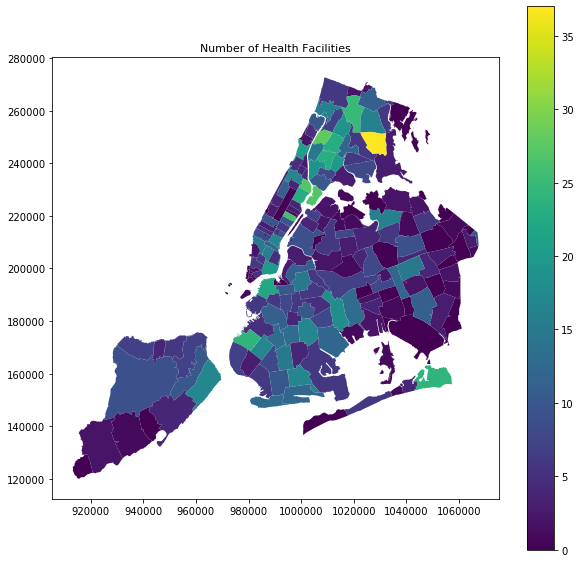

In [13]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax.set_title("Number of Health Facilities", fontsize=11)
zipcode.plot(ax=ax, column='count', legend = True)

In [9]:
zipcode = zipcode[(zipcode != 0).all(1)]
zipcode['PopDifference']=np.log(zipcode['POPULATION']/zipcode['count'])
zipcode

c:\users\zhaoxinran\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ZIPCODE,POPULATION,geometry,count,PopDifference
1,11213,62426.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ...",10.0,8.739152
2,11212,83866.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ...",8.0,9.257534
3,11225,56527.0,"POLYGON ((995908.365 183617.613, 996522.848 18...",4.0,9.556179
4,11218,72280.0,"POLYGON ((991997.113 176307.496, 992042.798 17...",13.0,8.623353
5,11226,106132.0,"POLYGON ((994821.473 177865.718, 994891.817 17...",13.0,9.007490
...,...,...,...,...,...
256,10036,23543.0,"POLYGON ((989419.213 215672.088, 989967.295 21...",3.0,8.967972
257,11414,26148.0,"POLYGON ((1025670.681 184011.380, 1025872.813 ...",2.0,9.478381
258,10310,25003.0,"POLYGON ((950767.507 172848.969, 950787.510 17...",6.0,8.334992
259,11693,11052.0,"POLYGON ((1028453.995 167153.410, 1027813.010 ...",1.0,9.310367


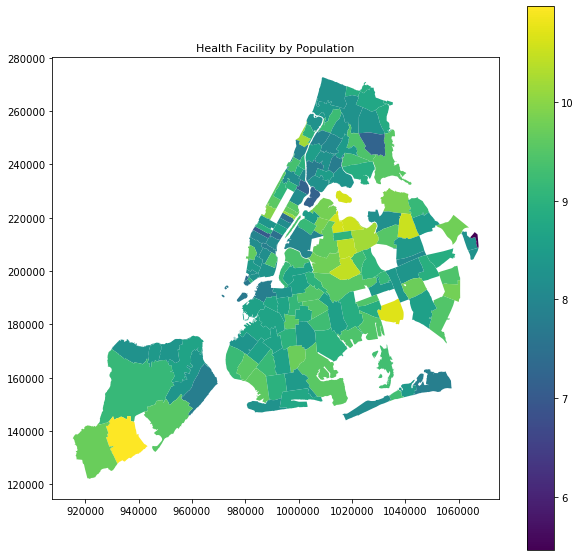

In [10]:
f, ax = plt.subplots(1, figsize=(10, 10))
ax.set_title("Health Facility by Population", fontsize=11)
zipcode.plot(ax=ax, column='PopDifference', legend = True)